In [32]:
import pandas as pd
import missingno as msno
import seaborn as sns

## 1. Load data

In [23]:
df_train = pd.read_excel(
    r"D:\OneDrive\01 WORK\# DampersClusterControl\03 IoT damper fitting\data\IoTDampers_250×250_v4\integrated.xlsx",
    sheet_name='train')
df_val = pd.read_excel(
    r"D:\OneDrive\01 WORK\# DampersClusterControl\03 IoT damper fitting\data\IoTDampers_250×250_v4\integrated.xlsx",
    sheet_name='val')

## 2. Check data

### 2.1 Overview

In [31]:
df_val.describe()

,前阀片组开度,后阀片开度,风量罩风量（m3/h）,风阀+连接件前后压差（Pa）,风阀读取压差（Pa）,标准额定风量（m3/h）
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,52.500000,46.875000,607.687500,112.216094,119.698438,840.750000
std,22.677868,15.923926,386.525626,112.255676,125.164409,525.362762
min,15.000000,15.000000,85.000000,0.000000,7.300000,110.000000
25%,41.250000,45.000000,258.750000,21.225000,19.100000,413.750000
50%,52.500000,45.000000,532.000000,83.450000,77.700000,827.000000
75%,63.750000,48.750000,870.250000,172.775000,181.475000,1240.250000
max,90.000000,75.000000,1434.000000,463.700000,508.400000,1654.000000


In [30]:
df_train.describe()

,前阀片组开度,后阀片开度,风量罩风量（m3/h）,风阀+连接件前后压差（Pa）,风阀读取压差（Pa）,标准额定风量（m3/h）
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000
mean,52.500000,44.558824,540.529412,136.564338,158.263603,840.750000
std,26.345701,32.494510,360.823452,129.201807,161.103074,522.203022
min,15.000000,0.000000,78.000000,0.000000,6.400000,110.000000
25%,30.000000,15.000000,236.000000,22.950000,16.100000,413.750000
50%,52.500000,37.500000,456.000000,104.100000,118.400000,827.000000
75%,75.000000,75.000000,746.000000,207.900000,252.300000,1240.250000
max,90.000000,90.000000,1654.000000,484.000000,646.900000,1654.000000


### 2.2 Check Repeated data

In [25]:
df_val.duplicated().value_counts()

False    64
dtype: int64

In [28]:
df_train.duplicated().value_counts()

False    272
dtype: int64

### 2.3 Check missing data
缺失值统计

#### 2.3.1 Overview

<Axes: >

C:\Users\KAI\scoop\apps\anaconda3\current\envs\ml-research\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from current font.
  func(*args, **kwargs)
C:\Users\KAI\scoop\apps\anaconda3\current\envs\ml-research\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 38400 (\N{CJK UNIFIED IDEOGRAPH-9600}) missing from current font.
  func(*args, **kwargs)
C:\Users\KAI\scoop\apps\anaconda3\current\envs\ml-research\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 29255 (\N{CJK UNIFIED IDEOGRAPH-7247}) missing from current font.
  func(*args, **kwargs)
C:\Users\KAI\scoop\apps\anaconda3\current\envs\ml-research\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 32452 (\N{CJK UNIFIED IDEOGRAPH-7EC4}) missing from current font.
  func(*args, **kwargs)
C:\Users\KAI\scoop\apps\anaconda3\current\envs\ml-research\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 24320 (\N{CJK UNIFIED IDE

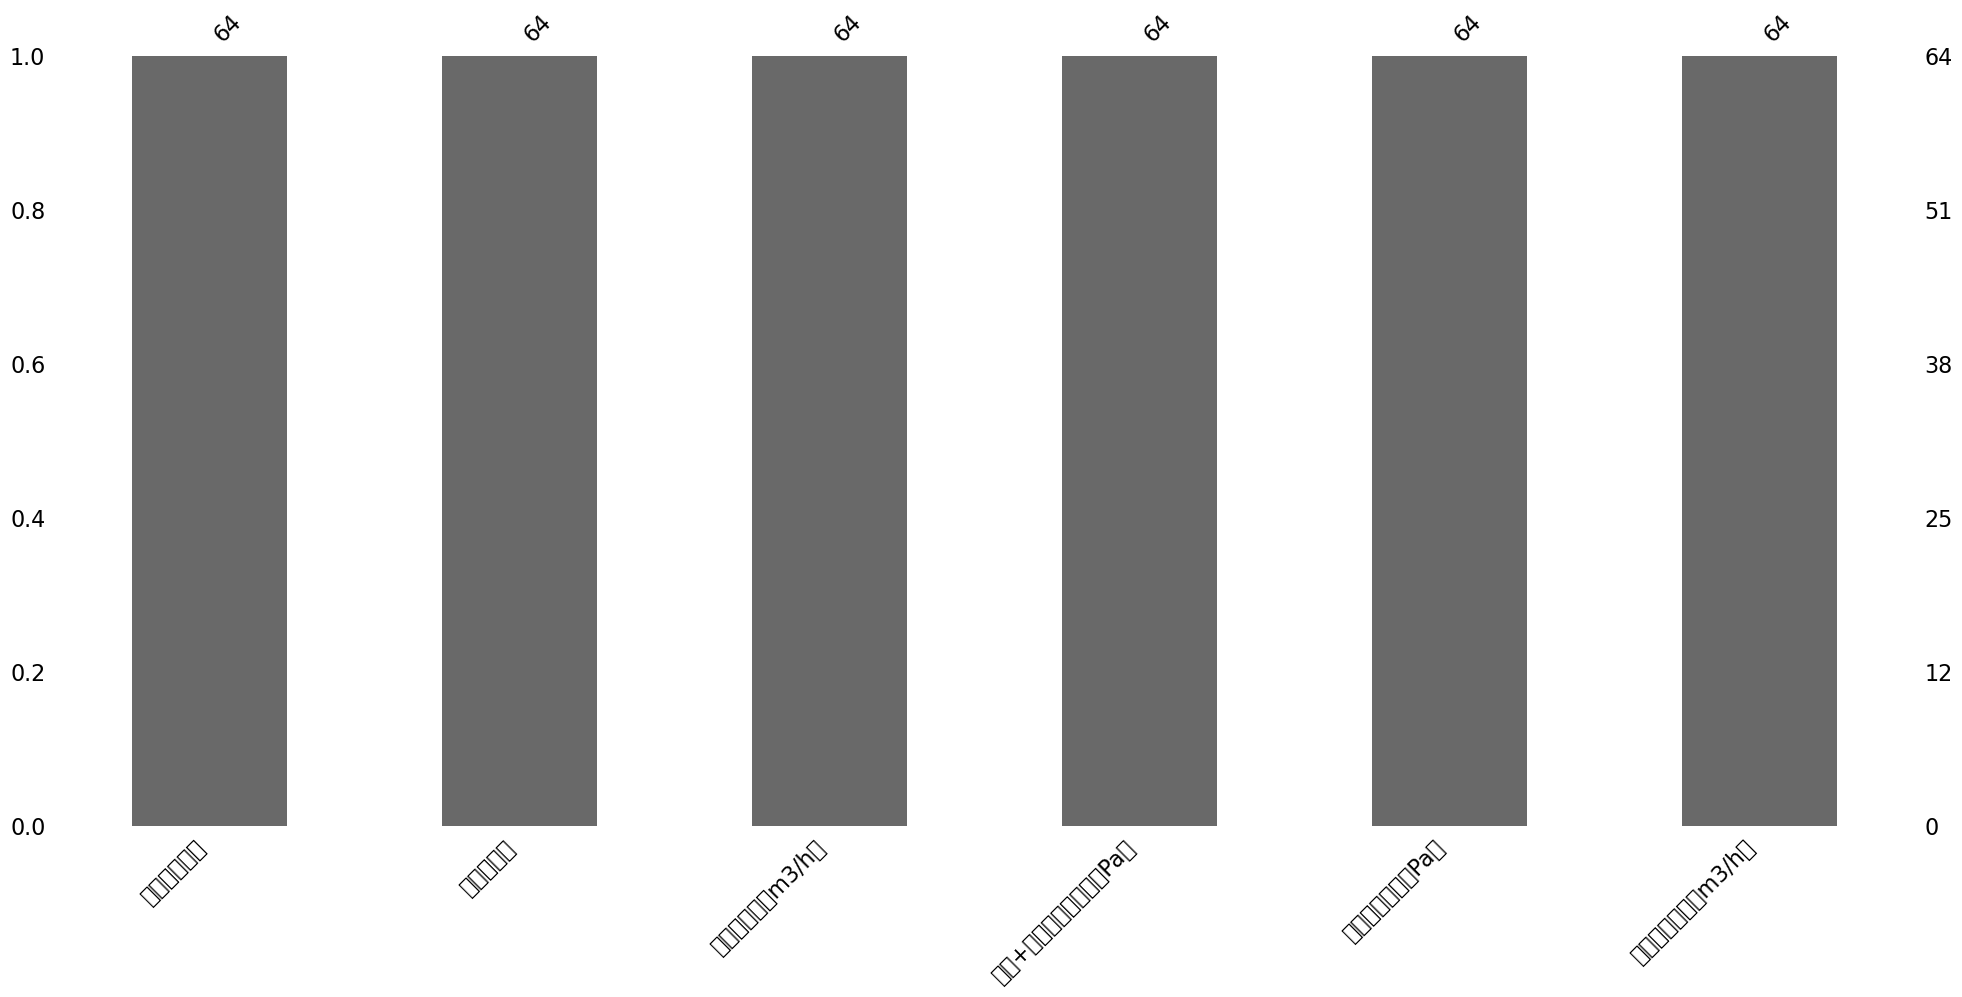

In [33]:
msno.bar(df_val)

<Axes: >

C:\Users\KAI\scoop\apps\anaconda3\current\envs\ml-research\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from current font.
  func(*args, **kwargs)
C:\Users\KAI\scoop\apps\anaconda3\current\envs\ml-research\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 38400 (\N{CJK UNIFIED IDEOGRAPH-9600}) missing from current font.
  func(*args, **kwargs)
C:\Users\KAI\scoop\apps\anaconda3\current\envs\ml-research\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 29255 (\N{CJK UNIFIED IDEOGRAPH-7247}) missing from current font.
  func(*args, **kwargs)
C:\Users\KAI\scoop\apps\anaconda3\current\envs\ml-research\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 32452 (\N{CJK UNIFIED IDEOGRAPH-7EC4}) missing from current font.
  func(*args, **kwargs)
C:\Users\KAI\scoop\apps\anaconda3\current\envs\ml-research\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 24320 (\N{CJK UNIFIED IDE

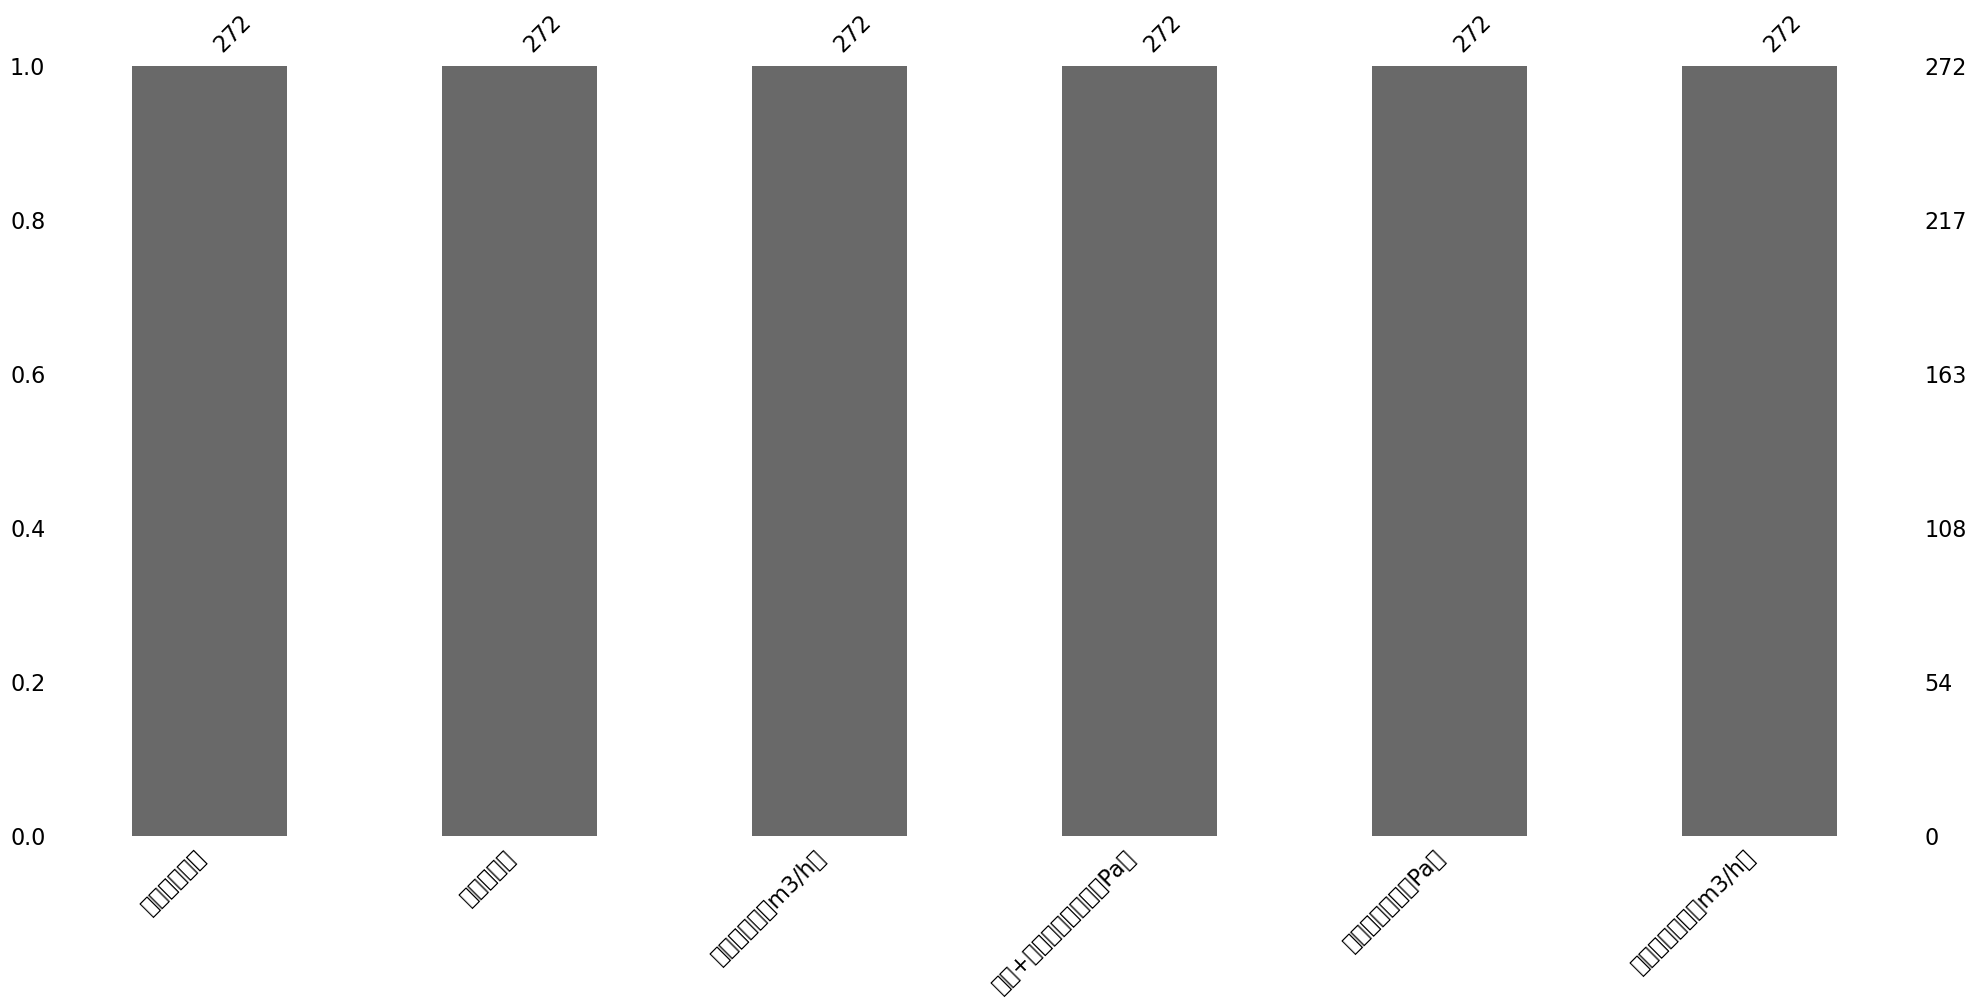

In [34]:
msno.bar(df_train)

#### 2.3.2 Per column

In [35]:
# 按列计算缺失值
def missing_values_table(df):
        # 总缺失值
        mis_val = df.isnull().sum()

        # 缺失值占比
        mis_val_percent = mis_val / len(df) * 100

        # 结果表
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # 重命名列名
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : '缺失值', 1 : '缺失值占比'})

        # 按缺失值占比降序排列
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '缺失值占比', ascending=False).round(1)

        # 打印信息
        print ("一共" + str(df.shape[1]) + "列，\n"
            "其中" + str(mis_val_table_ren_columns.shape[0]) +
              "列有缺失值。")

        return mis_val_table_ren_columns


In [39]:
missing_values_table(df_val)

一共6列，
其中0列有缺失值。


,缺失值,缺失值占比


In [41]:
missing_values_table(df_train)

一共6列，
其中0列有缺失值。


,缺失值,缺失值占比
